In [2]:
from dataset import dataset as ds
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gp
import rasterio
from mpl_toolkits.axes_grid1 import make_axes_locatable
#from dataset import rasterize

In [4]:
csv_pth = '/u/eag-d1/data/Hennepin/ver1/hennepin_bbox.csv'
shp_pth = './dataset/hennepin_county_parcels/hennepin_county_parcels.shp'
root_dir = '/u/eag-d1/data/Hennepin/ver1/'

dataset = ds.HennepinDatasetFull(csv_pth, shp_pth, root_dir)
print( len(dataset))

gdf = gp.read_file(shp_pth)
print(gdf)

5170


NameError: name 'shp_path' is not defined

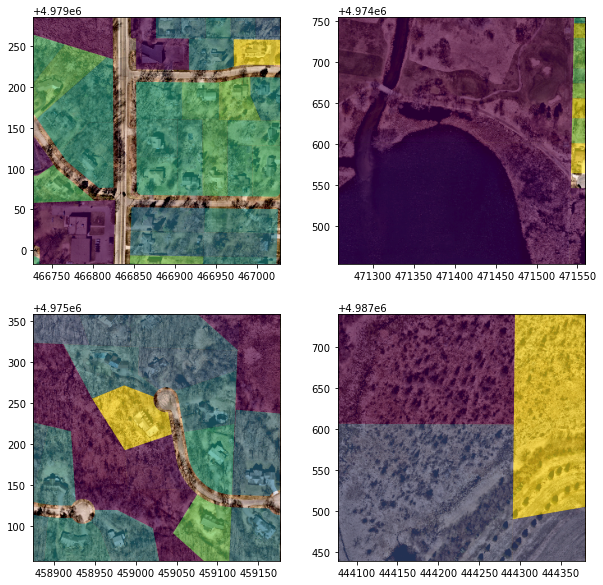

In [10]:
fig,axs = plt.subplots(2, 2, figsize = (10,10))
axs = axs.flatten()
for i in range(0,4):
    x = np.random.randint(len(dataset))
    image = np.moveaxis(dataset[x]['image'], 0, -1)
    gdf = dataset[x]['geometry']
    gdf.plot(column = 'TOTAL_MV1', ax = axs[i], alpha = 0.6, linewidth=3)
    axs[i].imshow(image, extent = dataset[x]['img_bbox'], origin = 'upper')
    #plotter.plot_tile(axs[i], dataset[x]['image'] , extent = dataset[x]['img_bbox'])
fig.savefig('./Plots/tiles.jpg')

In [12]:
index = 10

poly_array = dataset[index]['geometry']
image = dataset[index]['image']
mv_array = dataset[index]['value']
img_bbox = dataset[index]['img_bbox']
label = dataset[index]['pvalue_label']

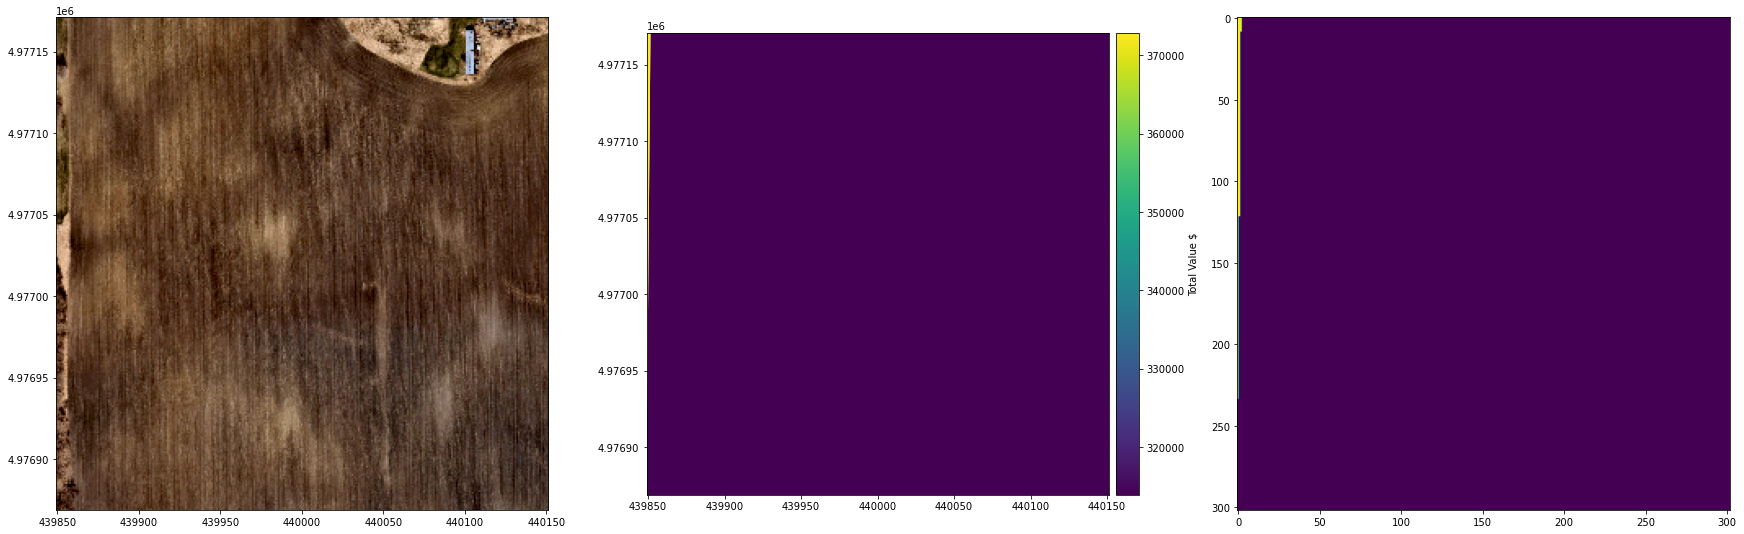

In [14]:
fig,axs = plt.subplots(1, 3, figsize = (30,30))

#MOVE CHANNEL
image = np.moveaxis(image, 0, -1)
label = np.moveaxis(label, 0, -1)

axs[0].imshow(image, extent = img_bbox, origin = 'upper')
#plotter.plot_tile(axs[0], image, extent = img_bbox)
axs[1].set_xlim( img_bbox[0:2] )
axs[1].set_ylim( img_bbox[2:4] )

divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="5%", pad=0.1)
poly_array.plot(column = 'TOTAL_MV1', ax = axs[1], alpha = 1, linewidth=3, legend = True, legend_kwds={'label': "Total Value $", 'orientation': "vertical"}, cax =cax)

axs[2].imshow(label, origin = 'upper')

#print(img_bbox[2:4])
#print(img_bbox[0:2])

In [16]:
fig.savefig('./Plots/parcel.jpg')

<AxesSubplot:>

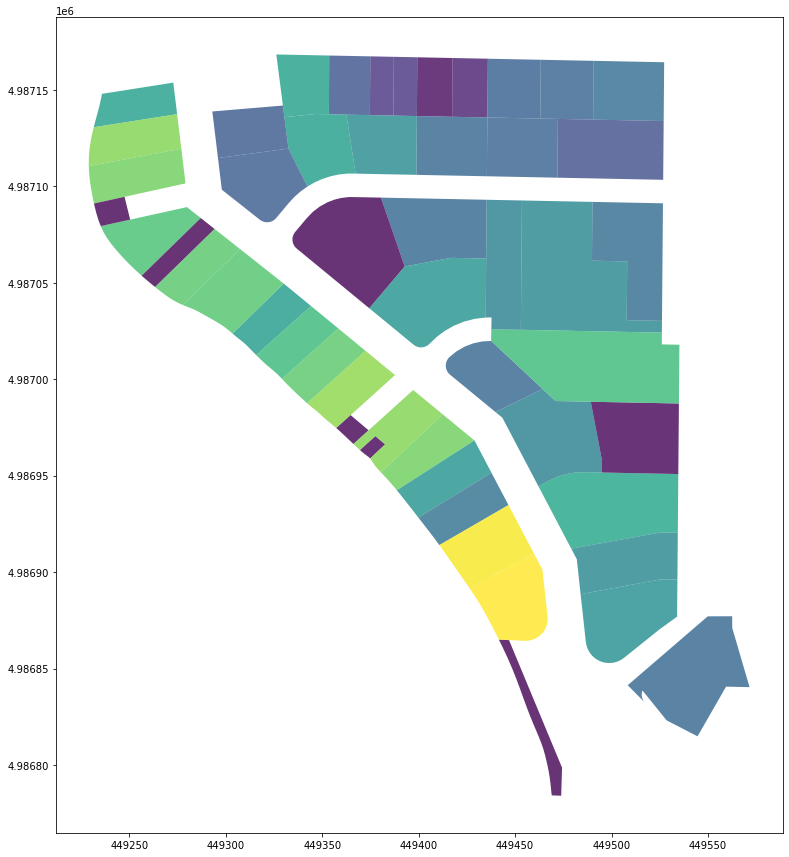

In [18]:
fig, ax = plt.subplots(figsize=(15, 15))
#rasterio.plot.show(image, ax=ax, extent=img_bbox)
poly_array.plot(column = 'TOTAL_MV1', ax = ax, alpha = 0.8)

In [20]:
index = 1500
poly_array = dataset[index]['geometry']
image = dataset[index]['image']
label_value = dataset[index]['pvalue_label']
label_mask = dataset[index]['pmask_label']
label_boundary = dataset[index]['pboundary_label']
label_buildings = dataset[index]['building_label']


image = np.moveaxis(image, 0, -1)
label_value = np.moveaxis(label_value, 0, -1)
label_mask = np.moveaxis(label_mask, 0, -1)
label_boundary = np.moveaxis(label_boundary, 0, -1)
label_buildings = np.moveaxis(label_buildings, 0, -1)


Text(0.5, 1.0, 'Building Mask')

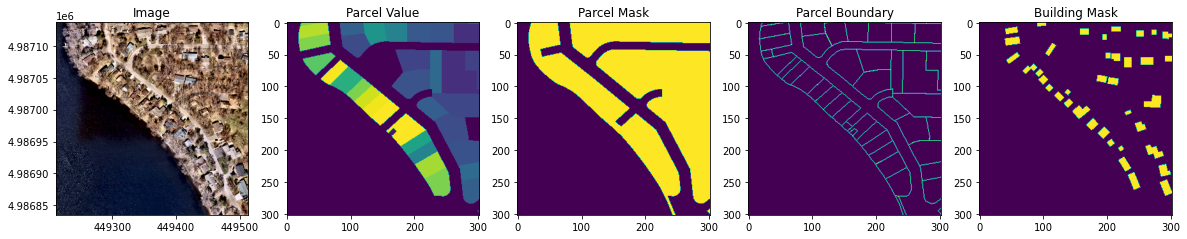

In [22]:
fig,axs = plt.subplots(1, 5, figsize = (20,16))


#divider = make_axes_locatable(axs[0])
#cax = divider.append_axes("right", size="5%", pad=0.1)
#poly_array.plot(column = 'TOTAL_MV1', ax = axs[0], alpha = 0.5, linewidth=3, legend = True, legend_kwds={'label': "Total Value $", 'orientation': "vertical"}, cax =cax)
axs[0].imshow(image, extent = dataset[index]['img_bbox'], origin = 'upper')

axs[1].imshow(label_value, origin = 'upper')
axs[2].imshow(label_mask, origin = 'upper')
axs[3].imshow(label_boundary, origin = 'upper')
axs[4].imshow(label_buildings, origin = 'upper')

axs[0].set_title("Image")
axs[1].set_title("Parcel Value")
axs[2].set_title("Parcel Mask")
axs[3].set_title("Parcel Boundary")
axs[4].set_title("Building Mask")

In [23]:
fig.savefig('./Plots/label.jpg')

In [24]:
label.max()

2

In [25]:
label_boundary

array([[[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [1]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [1]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]], dtype=uint8)